<a href="https://colab.research.google.com/github/NikhilGeorge01/KlymoAscent1.0-Satellite-Image-SuperResolution/blob/main/klymoascent1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("All libraries imported successfully!")


All libraries imported successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

BASE_DIR = "/content/drive/MyDrive/Satellite_SR_Project"

os.makedirs(f"{BASE_DIR}/data/LR", exist_ok=True)
os.makedirs(f"{BASE_DIR}/data/HR", exist_ok=True)
os.makedirs(f"{BASE_DIR}/patches/LR", exist_ok=True)
os.makedirs(f"{BASE_DIR}/patches/HR", exist_ok=True)
os.makedirs(f"{BASE_DIR}/checkpoints", exist_ok=True)
os.makedirs(f"{BASE_DIR}/outputs", exist_ok=True)

print("Drive-based project structure ready")


Drive-based project structure ready


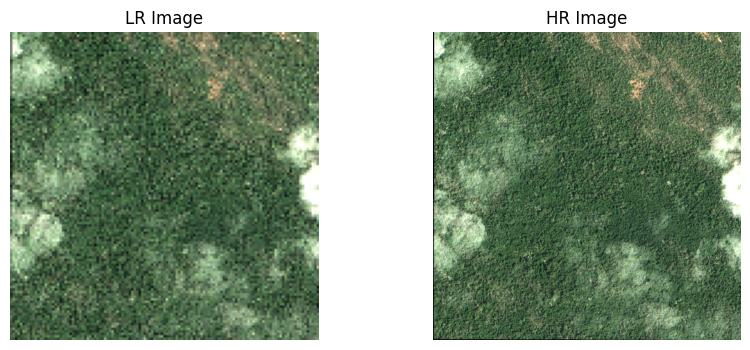

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

BASE_DIR = "/content/drive/MyDrive/Satellite_SR_Project/data"

LR_DIR = os.path.join(BASE_DIR, "LR")
HR_DIR = os.path.join(BASE_DIR, "HR")

# Pick one sample
fname = sorted(os.listdir(LR_DIR))[0]

lr_img = cv2.imread(os.path.join(LR_DIR, fname))
hr_img = cv2.imread(os.path.join(HR_DIR, fname))

# Convert BGR → RGB for correct colors
lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("LR Image")
plt.imshow(lr_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("HR Image")
plt.imshow(hr_img)
plt.axis("off")

plt.show()


In [6]:
import os
import cv2

BASE_DIR = "/content/drive/MyDrive/Satellite_SR_Project/data"

LR_DIR = os.path.join(BASE_DIR, "LR")
HR_DIR = os.path.join(BASE_DIR, "HR")

fname = sorted(os.listdir(LR_DIR))[0]

lr = cv2.imread(os.path.join(LR_DIR, fname))
hr = cv2.imread(os.path.join(HR_DIR, fname))

print("LR shape:", lr.shape)
print("HR shape:", hr.shape)
print("Height scale:", hr.shape[0] // lr.shape[0])
print("Width scale:", hr.shape[1] // lr.shape[1])


LR shape: (125, 125, 3)
HR shape: (500, 500, 3)
Height scale: 4
Width scale: 4


In [7]:
"""
import os
import cv2

# Base directories (Drive-first)
DATA_DIR = "/content/drive/MyDrive/Satellite_SR_Project/data"
PATCH_DIR = "/content/drive/MyDrive/Satellite_SR_Project/patches"

LR_DIR = os.path.join(DATA_DIR, "LR")
HR_DIR = os.path.join(DATA_DIR, "HR")

LR_PATCH_DIR = os.path.join(PATCH_DIR, "LR")
HR_PATCH_DIR = os.path.join(PATCH_DIR, "HR")

os.makedirs(LR_PATCH_DIR, exist_ok=True)
os.makedirs(HR_PATCH_DIR, exist_ok=True)

# Patch parameters (based on verified scale)
lr_patch_size = 25
scale = 4
hr_patch_size = lr_patch_size * scale

patch_id = 0

for fname in sorted(os.listdir(LR_DIR)):
    lr_path = os.path.join(LR_DIR, fname)
    hr_path = os.path.join(HR_DIR, fname)

    lr = cv2.imread(lr_path)
    hr = cv2.imread(hr_path)

    if lr is None or hr is None:
        continue

    h_lr, w_lr, _ = lr.shape

    for y in range(0, h_lr, lr_patch_size):
        for x in range(0, w_lr, lr_patch_size):

            lr_patch = lr[y:y+lr_patch_size, x:x+lr_patch_size]
            hr_patch = hr[
                y*scale:(y+lr_patch_size)*scale,
                x*scale:(x+lr_patch_size)*scale
            ]

            # Safety check (should always pass)
            if lr_patch.shape[:2] != (lr_patch_size, lr_patch_size):
                continue
            if hr_patch.shape[:2] != (hr_patch_size, hr_patch_size):
                continue

            cv2.imwrite(
                os.path.join(LR_PATCH_DIR, f"{patch_id}.png"),
                lr_patch
            )
            cv2.imwrite(
                os.path.join(HR_PATCH_DIR, f"{patch_id}.png"),
                hr_patch
            )

            patch_id += 1

print("Total patch pairs created:", patch_id)
"""

'\nimport os\nimport cv2\n\n# Base directories (Drive-first)\nDATA_DIR = "/content/drive/MyDrive/Satellite_SR_Project/data"\nPATCH_DIR = "/content/drive/MyDrive/Satellite_SR_Project/patches"\n\nLR_DIR = os.path.join(DATA_DIR, "LR")\nHR_DIR = os.path.join(DATA_DIR, "HR")\n\nLR_PATCH_DIR = os.path.join(PATCH_DIR, "LR")\nHR_PATCH_DIR = os.path.join(PATCH_DIR, "HR")\n\nos.makedirs(LR_PATCH_DIR, exist_ok=True)\nos.makedirs(HR_PATCH_DIR, exist_ok=True)\n\n# Patch parameters (based on verified scale)\nlr_patch_size = 25\nscale = 4\nhr_patch_size = lr_patch_size * scale\n\npatch_id = 0\n\nfor fname in sorted(os.listdir(LR_DIR)):\n    lr_path = os.path.join(LR_DIR, fname)\n    hr_path = os.path.join(HR_DIR, fname)\n\n    lr = cv2.imread(lr_path)\n    hr = cv2.imread(hr_path)\n\n    if lr is None or hr is None:\n        continue\n\n    h_lr, w_lr, _ = lr.shape\n\n    for y in range(0, h_lr, lr_patch_size):\n        for x in range(0, w_lr, lr_patch_size):\n\n            lr_patch = lr[y:y+lr_patch

In [9]:
!rm -rf /content/patches
!mkdir -p /content/patches/LR
!mkdir -p /content/patches/HR

!cp -r /content/drive/MyDrive/Satellite_SR_Project/patches/LR/* /content/patches/LR/
!cp -r /content/drive/MyDrive/Satellite_SR_Project/patches/HR/* /content/patches/HR/


In [10]:
import os
import cv2
import torch
from torch.utils.data import Dataset

class SRPatchDataset(Dataset):
    def __init__(self, lr_dir, hr_dir):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.filenames = sorted(os.listdir(lr_dir))

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        fname = self.filenames[idx]

        lr = cv2.imread(os.path.join(self.lr_dir, fname))
        hr = cv2.imread(os.path.join(self.hr_dir, fname))

        lr = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
        hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

        lr = lr.astype("float32") / 255.0
        hr = hr.astype("float32") / 255.0

        lr = torch.from_numpy(lr).permute(2, 0, 1)
        hr = torch.from_numpy(hr).permute(2, 0, 1)

        return lr, hr


In [11]:
from torch.utils.data import Subset
import random

lr_patch_dir = "/content/patches/LR"
hr_patch_dir = "/content/patches/HR"

dataset = SRPatchDataset(lr_patch_dir, hr_patch_dir)
print("Total local patch pairs:", len(dataset))


print("Training on patches:", len(dataset))


Total local patch pairs: 12500
Training on patches: 12500


In [12]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=2,      # SAFE now (local disk)
    pin_memory=True
)

lr_batch, hr_batch = next(iter(dataloader))
print("LR batch:", lr_batch.shape)
print("HR batch:", hr_batch.shape)


LR batch: torch.Size([4, 3, 25, 25])
HR batch: torch.Size([4, 3, 100, 100])


In [13]:
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, 3, padding=1)
        )

    def forward(self, x):
        return x + self.block(x)

class SRResNet(nn.Module):
    def __init__(self, scale_factor=4, num_channels=3):
        super().__init__()

        self.entry = nn.Conv2d(num_channels, 64, 9, padding=4)
        self.residuals = nn.Sequential(*[ResidualBlock(64) for _ in range(8)])
        self.mid = nn.Conv2d(64, 64, 3, padding=1)

        self.upsample = nn.Sequential(
            nn.Conv2d(64, 64 * (scale_factor ** 2), 3, padding=1),
            nn.PixelShuffle(scale_factor)
        )

        self.exit = nn.Conv2d(64, num_channels, 9, padding=4)

    def forward(self, x):
        x = self.entry(x)
        res = x
        x = self.residuals(x)
        x = self.mid(x)
        x = x + res
        x = self.upsample(x)
        return self.exit(x)


In [ ]:
"""
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SRResNet(scale_factor=4).to(device)

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 15
model.train()

for epoch in range(num_epochs):
    epoch_loss = 0.0
    print(f"Epoch {epoch+1} started")

    for lr, hr in dataloader:
        lr = lr.to(device)
        hr = hr.to(device)

        sr = model(lr)
        loss = criterion(sr, hr)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.6f}")
"""

In [ ]:
'''
SAVE_PATH = "/content/drive/MyDrive/Satellite_SR_Project/checkpoints"
os.makedirs(SAVE_PATH, exist_ok=True)

torch.save(
    model.state_dict(),
    os.path.join(SAVE_PATH, "srresnet_x4.pth")
)

print("Model saved successfully")
'''

Model saved successfully


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SRResNet(scale_factor=4).to(device)
model.load_state_dict(
    torch.load("/content/drive/MyDrive/Satellite_SR_Project/checkpoints/srresnet_x4.pth")
)
model.eval()


SRResNet(
  (entry): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (residuals): Sequential(
    (0): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (1): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (2): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

In [16]:
import torch.nn.functional as F

def bicubic_upsample(lr):
    return F.interpolate(
        lr,
        scale_factor=4,
        mode="bicubic",
        align_corners=False
    )


In [17]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


In [18]:
def evaluate_metrics(model, dataloader, device):
    model.eval()

    psnr_sr, psnr_bi = [], []
    ssim_sr, ssim_bi = [], []

    with torch.no_grad():
        for lr, hr in dataloader:
            lr = lr.to(device)
            hr = hr.to(device)

            sr = model(lr)
            bi = bicubic_upsample(lr)

            sr_np = sr.permute(0,2,3,1).cpu().numpy()
            bi_np = bi.permute(0,2,3,1).cpu().numpy()
            hr_np = hr.permute(0,2,3,1).cpu().numpy()

            for i in range(sr_np.shape[0]):
                psnr_sr_val = psnr(hr_np[i], sr_np[i], data_range=1.0)
                psnr_bi_val = psnr(hr_np[i], bi_np[i], data_range=1.0)

                if not np.isinf(psnr_sr_val):
                    psnr_sr.append(psnr_sr_val)
                if not np.isinf(psnr_bi_val):
                    psnr_bi.append(psnr_bi_val)

                ssim_sr.append(
                    ssim(hr_np[i], sr_np[i], channel_axis=2, data_range=1.0)
                )
                ssim_bi.append(
                    ssim(hr_np[i], bi_np[i], channel_axis=2, data_range=1.0)
                )

    return {
        "SR_PSNR": np.mean(psnr_sr),
        "SR_SSIM": np.mean(ssim_sr),
        "Bicubic_PSNR": np.mean(psnr_bi),
        "Bicubic_SSIM": np.mean(ssim_bi),
    }


In [19]:
metrics = evaluate_metrics(model, dataloader, device)

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


/usr/local/lib/python3.12/dist-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


SR_PSNR: 28.2485
SR_SSIM: 0.6987
Bicubic_PSNR: 27.2146
Bicubic_SSIM: 0.6692


In [20]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def show_comparison(model, dataloader, device, idx=0):
    model.eval()

    lr, hr = next(iter(dataloader))
    lr = lr.to(device)

    with torch.no_grad():
        sr = model(lr)
        bi = F.interpolate(lr, scale_factor=4, mode="bicubic", align_corners=False)

    # Select one sample from batch
    lr_img = lr[idx].permute(1,2,0).cpu().numpy()
    bi_img = bi[idx].permute(1,2,0).cpu().numpy()
    sr_img = sr[idx].permute(1,2,0).cpu().numpy()
    hr_img = hr[idx].permute(1,2,0).cpu().numpy()

    fig, axs = plt.subplots(1, 4, figsize=(16,4))

    axs[0].imshow(lr_img)
    axs[0].set_title("LR Input")
    axs[0].axis("off")

    axs[1].imshow(bi_img)
    axs[1].set_title("Bicubic ×4")
    axs[1].axis("off")

    axs[2].imshow(sr_img)
    axs[2].set_title("SRResNet ×4")
    axs[2].axis("off")

    axs[3].imshow(hr_img)
    axs[3].set_title("HR Ground Truth")
    axs[3].axis("off")

    plt.show()


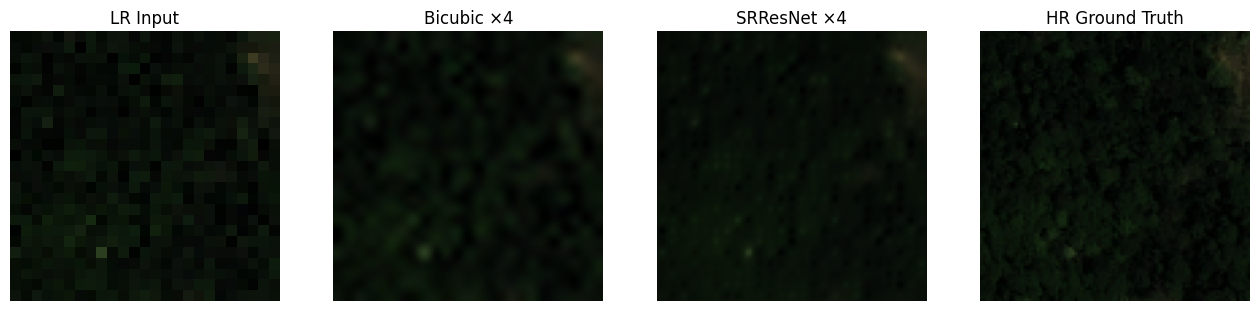

In [21]:
show_comparison(model, dataloader, device, idx=0)


In [22]:
import ee
import os


In [23]:
# Authenticate (required once per Colab runtime)
ee.Authenticate()


In [24]:
# Initialize Earth Engine with your existing project
ee.Initialize(project="gee-sr-project-486109")

print("Earth Engine initialized with project gee-sr-project-486109")


Earth Engine initialized with project gee-sr-project-486109


In [25]:
# Example ROI (urban region – change if you want)
roi = ee.Geometry.Rectangle([
    77.55, 12.95,   # min lon, min lat
    77.60, 13.00    # max lon, max lat
])


In [26]:
# Load Sentinel-2 Surface Reflectance (LR data)
sentinel2 = (
    ee.ImageCollection("COPERNICUS/S2_SR")
    .filterBounds(roi)
    .filterDate("2023-01-01", "2023-03-01")
    .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 10))
    .median()
    .select(["B4", "B3", "B2"])  # RGB
)


/usr/local/lib/python3.12/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


In [27]:
task = ee.batch.Export.image.toDrive(
    image=sentinel2,
    description="Sentinel2_LR_demo",
    folder="Satellite_SR_Project/demo",
    fileNamePrefix="Sentinel2_LR_demo",
    region=roi,
    scale=10,          # 10 meters per pixel (LR)
    maxPixels=1e9
)

task.start()
print("Export task started. Check Google Drive when finished.")


Export task started. Check Google Drive when finished.


In [28]:
import ee
ee.Initialize(project="gee-sr-project-486109")

tasks = ee.batch.Task.list()
for t in tasks:
    print(t.status())


{'state': 'READY', 'description': 'Sentinel2_LR_demo', 'priority': 100, 'creation_timestamp_ms': 1770120911271, 'update_timestamp_ms': 1770120911271, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'XCXPSVDIMJREEB52P7BU2EIN', 'name': 'projects/gee-sr-project-486109/operations/XCXPSVDIMJREEB52P7BU2EIN'}
{'state': 'COMPLETED', 'description': 'Sentinel2_LR_demo', 'priority': 100, 'creation_timestamp_ms': 1770043157072, 'update_timestamp_ms': 1770043203767, 'start_timestamp_ms': 1770043166880, 'task_type': 'EXPORT_IMAGE', 'destination_uris': ['https://drive.google.com/#folders/1wPbqxV7l90RJbM9tgUm2s-8KCH88D9-3'], 'attempt': 1, 'batch_eecu_usage_seconds': 5.060239791870117, 'id': '5SFM7RETMDOEEK5RXV4PY33R', 'name': 'projects/gee-sr-project-486109/operations/5SFM7RETMDOEEK5RXV4PY33R'}


In [29]:
import os

# Search recursively inside MyDrive
for root, dirs, files in os.walk("/content/drive/MyDrive"):
    for f in files:
        if "Sentinel2_LR_demo" in f and f.endswith(".tif"):
            print(os.path.join(root, f))


/content/drive/MyDrive/Satellite_SR_Project demo/Sentinel2_LR_demo.tif


In [30]:
import rasterio
import numpy as np

lr_path = "/content/drive/MyDrive/Satellite_SR_Project demo/Sentinel2_LR_demo.tif"

with rasterio.open(lr_path) as src:
    lr_img = src.read([1, 2, 3])   # RGB
    lr_img = np.transpose(lr_img, (1, 2, 0))
    lr_img = lr_img.astype("float32") / 10000.0  # Sentinel-2 normalization

print("LR image shape:", lr_img.shape)


LR image shape: (558, 558, 3)


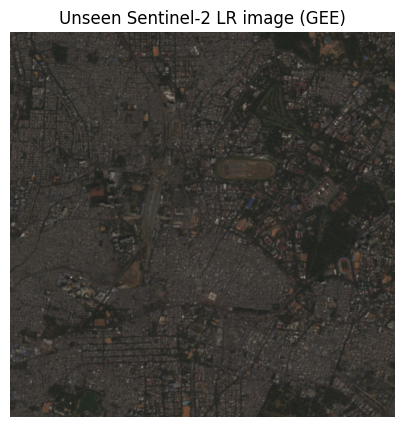

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(lr_img)
plt.title("Unseen Sentinel-2 LR image (GEE)")
plt.axis("off")
plt.show()


In [32]:
import numpy as np

lr_patch_size = 25
scale = 4

H, W, _ = lr_img.shape

pad_h = (lr_patch_size - H % lr_patch_size) % lr_patch_size
pad_w = (lr_patch_size - W % lr_patch_size) % lr_patch_size

lr_padded = np.pad(
    lr_img,
    ((0, pad_h), (0, pad_w), (0, 0)),
    mode="reflect"
)

Hp, Wp, _ = lr_padded.shape
print("Padded LR shape:", lr_padded.shape)


Padded LR shape: (575, 575, 3)


In [33]:
sr_canvas = np.zeros((Hp * scale, Wp * scale, 3), dtype=np.float32)


In [34]:
import torch

model.eval()

for y in range(0, Hp, lr_patch_size):
    for x in range(0, Wp, lr_patch_size):

        lr_patch = lr_padded[y:y+lr_patch_size, x:x+lr_patch_size]

        lr_tensor = (
            torch.from_numpy(lr_patch)
            .permute(2, 0, 1)
            .unsqueeze(0)
            .to(device)
        )

        with torch.no_grad():
            sr_patch = model(lr_tensor)

        sr_patch = (
            sr_patch.squeeze(0)
            .permute(1, 2, 0)
            .cpu()
            .numpy()
        )

        sr_canvas[
            y*scale:(y+lr_patch_size)*scale,
            x*scale:(x+lr_patch_size)*scale
        ] = sr_patch


In [35]:
sr_img = sr_canvas[:H*scale, :W*scale]
sr_img = np.clip(sr_img, 0, 1)


In [36]:
import torch.nn.functional as F

lr_tensor_full = (
    torch.from_numpy(lr_img)
    .permute(2, 0, 1)
    .unsqueeze(0)
)

bicubic = F.interpolate(
    lr_tensor_full,
    scale_factor=4,
    mode="bicubic",
    align_corners=False
)

bicubic_img = (
    bicubic.squeeze(0)
    .permute(1, 2, 0)
    .numpy()
)


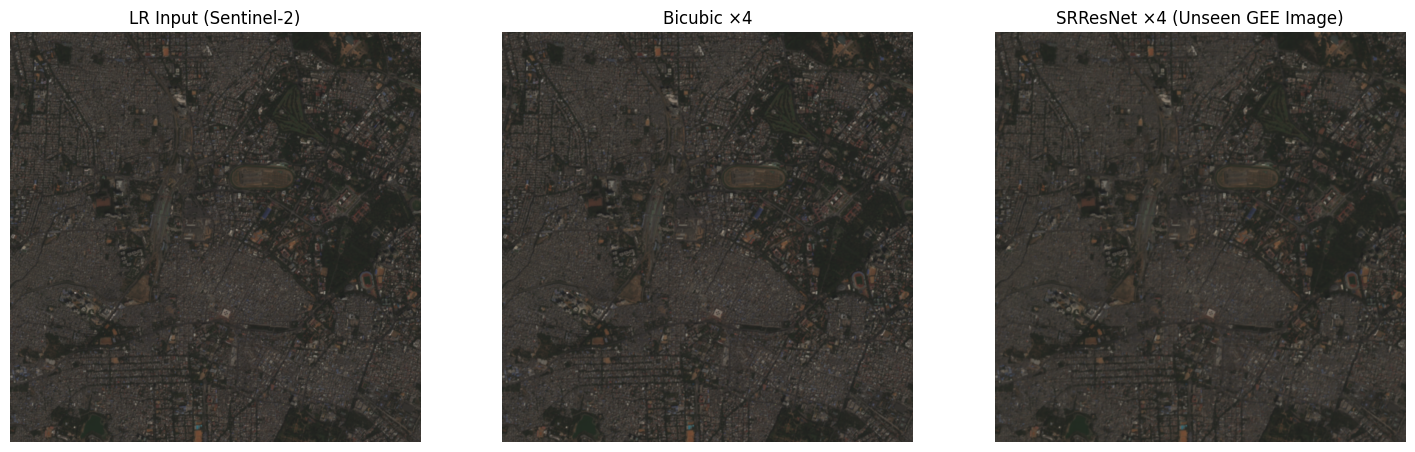

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(lr_img)
axs[0].set_title("LR Input (Sentinel-2)")
axs[0].axis("off")

axs[1].imshow(bicubic_img)
axs[1].set_title("Bicubic ×4")
axs[1].axis("off")

axs[2].imshow(sr_img)
axs[2].set_title("SRResNet ×4 (Unseen GEE Image)")
axs[2].axis("off")

plt.show()


In [38]:
def show_zoom_crop(lr_img, bicubic_img, sr_img, x, y, w, h):
    import matplotlib.pyplot as plt

    lr_crop = lr_img[y:y+h, x:x+w]
    bi_crop = bicubic_img[y*4:(y+h)*4, x*4:(x+w)*4]
    sr_crop = sr_img[y*4:(y+h)*4, x*4:(x+w)*4]

    fig, axs = plt.subplots(1, 3, figsize=(12,4))

    axs[0].imshow(lr_crop)
    axs[0].set_title("LR Crop")
    axs[0].axis("off")

    axs[1].imshow(bi_crop)
    axs[1].set_title("Bicubic ×4 Crop")
    axs[1].axis("off")

    axs[2].imshow(sr_crop)
    axs[2].set_title("SRResNet ×4 Crop")
    axs[2].axis("off")

    plt.show()


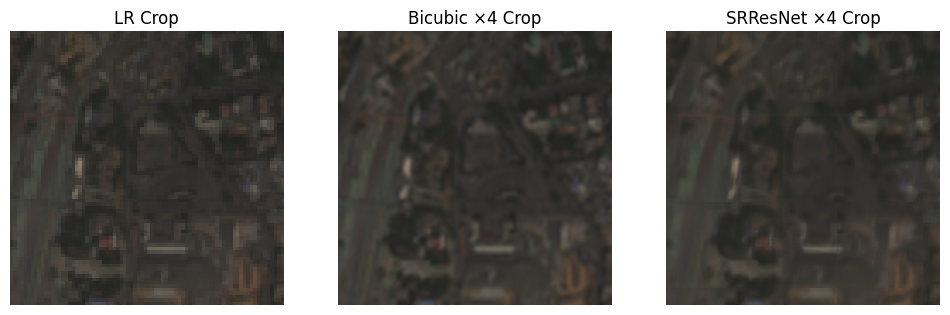

In [39]:
show_zoom_crop(lr_img, bicubic_img, sr_img, x=200, y=200, w=80, h=80)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


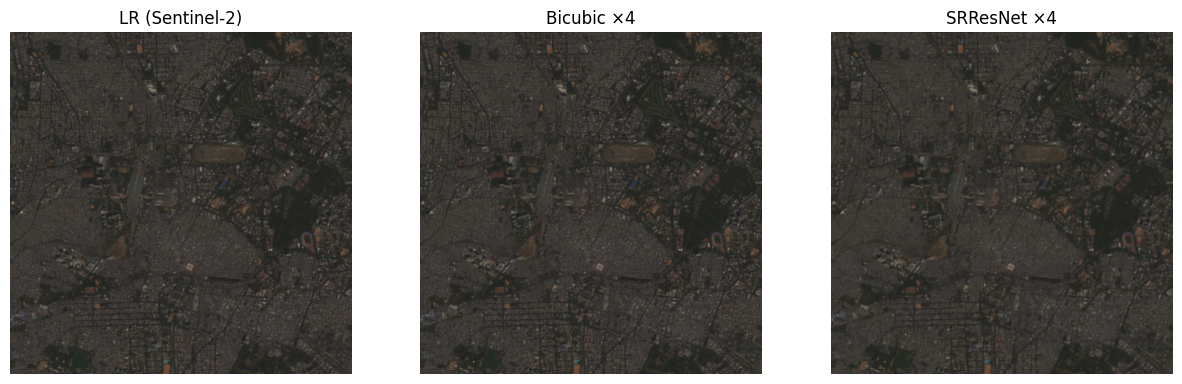

In [40]:
# 1. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Imports
import os, cv2, torch, numpy as np
import torch.nn.functional as F
import rasterio
import matplotlib.pyplot as plt

# 3. Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 4. Load model
model = SRResNet(scale_factor=4).to(device)
model.load_state_dict(
    torch.load(
        "/content/drive/MyDrive/Satellite_SR_Project/checkpoints/srresnet_x4.pth",
        map_location=device
    )
)
model.eval()

# 5. Load GEE LR image
lr_path = "/content/drive/MyDrive/Satellite_SR_Project demo/Sentinel2_LR_demo.tif"
with rasterio.open(lr_path) as src:
    lr_img = src.read([1,2,3])
    lr_img = np.transpose(lr_img, (1,2,0))
    lr_img = lr_img.astype("float32") / 10000.0

# 6. Bicubic baseline
lr_tensor = torch.from_numpy(lr_img).permute(2,0,1).unsqueeze(0)
bicubic = F.interpolate(lr_tensor, scale_factor=4, mode="bicubic", align_corners=False)
bicubic_img = bicubic.squeeze(0).permute(1,2,0).numpy()

# 7. Show final comparison
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(lr_img); plt.title("LR (Sentinel-2)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(bicubic_img); plt.title("Bicubic ×4"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(sr_img); plt.title("SRResNet ×4"); plt.axis("off")
plt.show()
